# **WEATHER PREDICTION**

## Introduction:

Weather prediction is a crucial aspect of daily life, affecting everything from agriculture to transportation to emergency preparedness. While traditional forecasting methods have come a long way, there is still much room for improvement in accuracy and efficiency. In recent years, machine learning (ML) has emerged as a promising approach to weather prediction. By leveraging the vast amounts of data collected from weather stations around the world, ML models can analyze complex patterns and relationships to make more accurate and timely predictions.

In this report, we will use the "seattle-weather.csv" dataset from Kaggle to analyze and build predictive models of weather conditions based on accompanying conditions. This is a set of weather data in the US state of Seattle recorded on a daily basis for about 4 years, includes weather conditions such as observed date, high and low temperature, precipitation, speed wind and weather conditions of the day associated with those conditions.

Models used: Logistic Regression, Decision Tree, K-Nearest Neighbor Classifier (KNN).

## Import Library

imports necessary libraries such as numpy, pandas, seaborn, etc. for data manipulation, visualization, statistical analysis, and machine learning.

In [332]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import scipy
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, ttest_ind
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

## **1.UNDERSTANDING THE DATASET**

In [335]:
# Load the CSV file into a DataFrame
data = pd.read_csv("dataset.csv")

# Display the first five rows of the DataFrame
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [337]:
# Print the dimensions of the DataFrame
print(data.shape)

(1461, 6)


There are 6 columns with a total of 1461 rows according to the observations in the dataset

In [340]:
# Print information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


There are 6 variables corresponding to 6 columns in the dataset:  
  4 variables indicating weather conditions including: precipitation, temp_max, temp_min, wind  
  1 variable to record date information: date has the form YYYY-MM-DD  
  1 variable indicating weather condition: weather  

The variable precipitation indicates the precipitation information of all forms of water falling to the ground such as rain, hail, snowfall or drizzle.  
The temp_max variable indicates the highest temperature of the day.  
The temp_min variable indicates the lowest temperature of the day.  
The wind variable stores wind speed information for the day.  
The weather defines the weather of the day.

## VISUALIZING THE DATASET

In this step, we will conduct the analysis of the variables in the data set that we have collected above.

First, we will start from the variable weather with the weather classification conditions.

/var/folders/rf/rpzbs9s151x32mjps8w1lq500000gn/T/ipykernel_97931/1975381491.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weather_encoded', data=data, palette='hls')


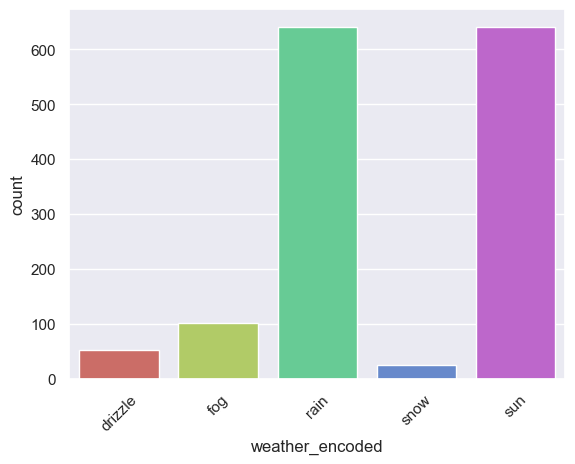

In [346]:
# Create a label encoder object
le = LabelEncoder()

# Fit the encoder to the weather column and transform the values
data['weather_encoded'] = le.fit_transform(data['weather'])

# Create a dictionary that maps the encoded values to the actual names
weather_names = dict(zip(le.transform(le.classes_), le.classes_))

# Plot the count of each unique value in the weather column
sns.countplot(x='weather_encoded', data=data, palette='hls')

# Set the x-tick labels with actual names
plt.xticks(ticks=list(weather_names.keys()), labels=list(weather_names.values()), rotation=45)

# Show the plot
plt.show()

In [348]:
# Get the value counts of each unique value in the weather column
weather_counts = data['weather'].value_counts()

# Print the percentage of each unique value in the weather column
for weather, count in weather_counts.items():
    percent = (count / len(data)) * 100
    print(f"Percent of {weather.capitalize()}: {percent:.2f}%")


Percent of Rain: 43.87%
Percent of Sun: 43.81%
Percent of Fog: 6.91%
Percent of Drizzle: 3.63%
Percent of Snow: 1.78%


From the above graph and analysis, we can see that our dataset contains mostly rain and sun weather conditions with more than 600 data lines and is approximately the same when accounting for 43.3% of the set. data. For weather conditions such as snow, fog and drizzle there are less than 100 data lines when less than 10% of the dataset.  
General comment: Since there is little data about snow, fog and drizzle, this can affect the accuracy of the model when predicting snow, fog and drizzle weather conditions. when too little data to train.

Next, we will learn about the variables that play the role of weather conditions in the dataset, including: precipitation, temp_max, temp_min, wind

In [352]:
data[["precipitation","temp_max","temp_min","wind"]].describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


We view the distribution of the value variables using the Histogram. graph.

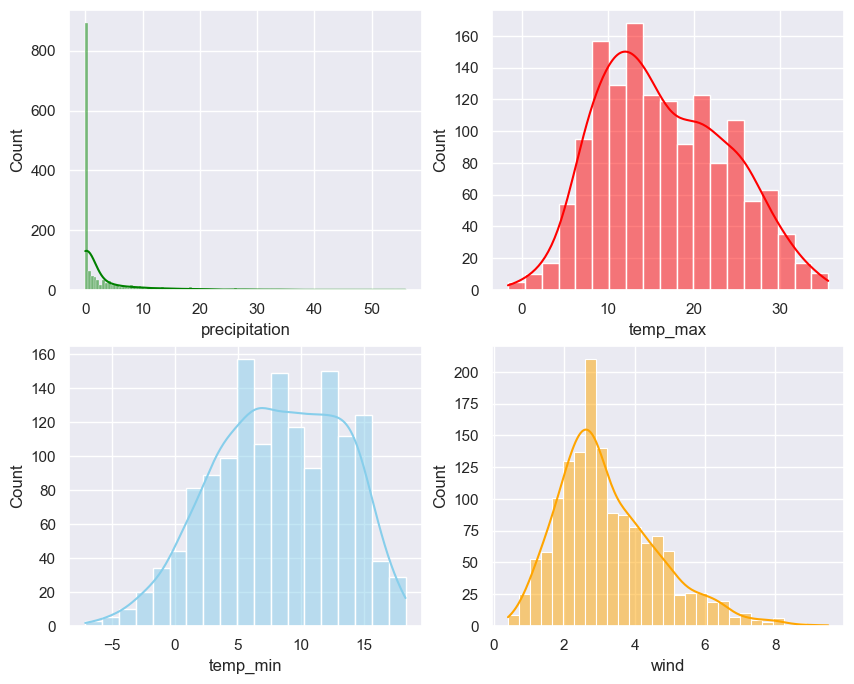

In [355]:
sns.set(style="darkgrid")

# Define the variables and colors for the subplots
variables = ["precipitation", "temp_max", "temp_min", "wind"]
colors = ["green", "red", "skyblue", "orange"]

# Create the subplots using a loop
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
for i, var in enumerate(variables):
    sns.histplot(data=data, x=var, kde=True, ax=axs[i//2, i%2], color=colors[i])

From the graphs above, it is clear that the distribution of precipitation, wind and has positively skewed (right skewed). The right tail is longer than the left tail.  
The distribution of temp_min has negative skewness (left skewed)  
And both have some outliers.

## USING BOXPLOT TO FIND EXTERNAL VALUE AND DIVILITY OF CONDITION VALUES

/var/folders/rf/rpzbs9s151x32mjps8w1lq500000gn/T/ipykernel_97931/1512939914.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="precipitation", y="weather", data=data, palette="winter", ax=ax)


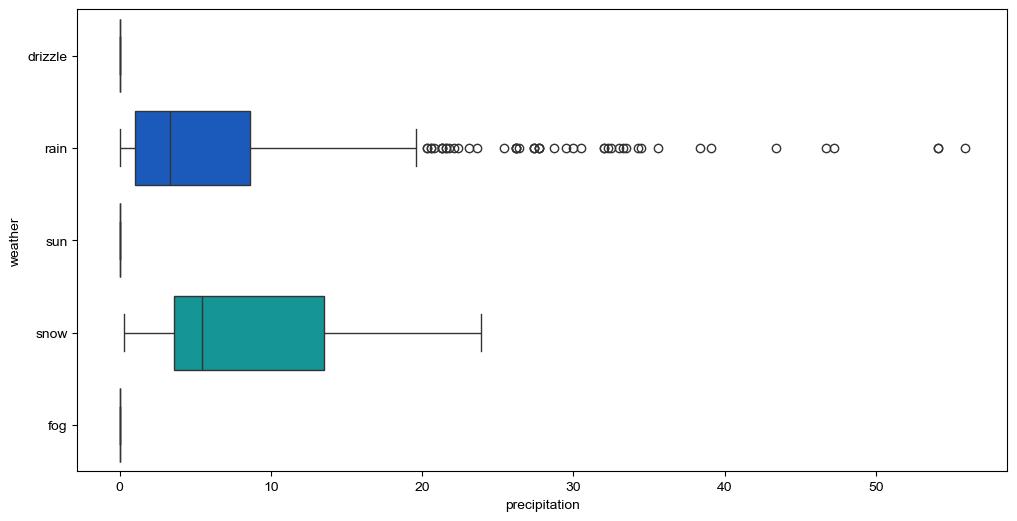

In [491]:
# Use a context manager to apply the default style to the plot
with plt.style.context('default'):
    
    # Create a figure with the specified size and an axis object
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot a boxplot with the given data, using the specified x and y variables, color palette, and axis object
    sns.boxplot(x="precipitation", y="weather", data=data, palette="winter", ax=ax)

From the boxplot between weather and precipitation above, the value of rain has many positive outliers, and both rain and snow are right-skewed/positively skewed.

/var/folders/rf/rpzbs9s151x32mjps8w1lq500000gn/T/ipykernel_97931/4271843321.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="temp_max", y="weather", data=data, palette="spring", ax=ax)


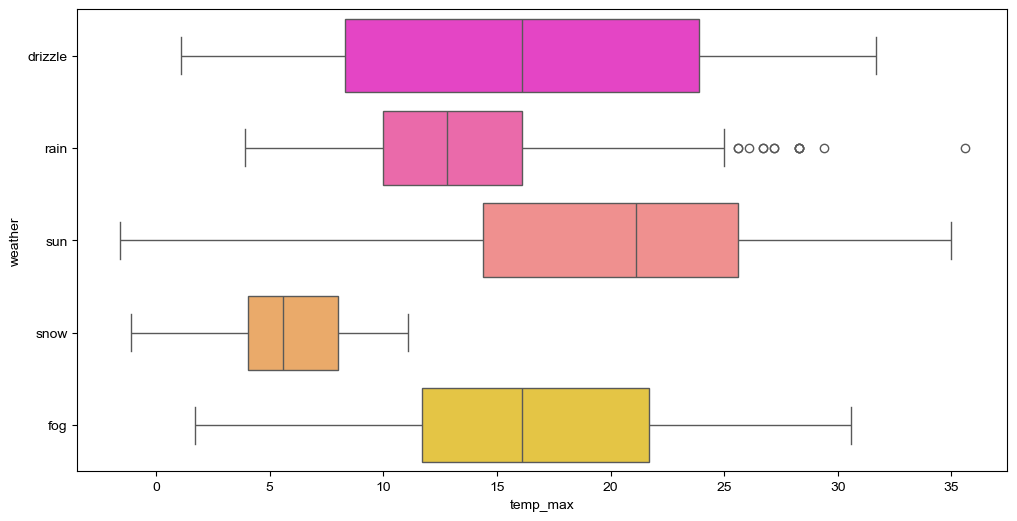

In [362]:
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(x="temp_max", y="weather", data=data, palette="spring", ax=ax)

/var/folders/rf/rpzbs9s151x32mjps8w1lq500000gn/T/ipykernel_97931/1567082730.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="wind", y="weather", data=data, palette="summer", ax=ax)


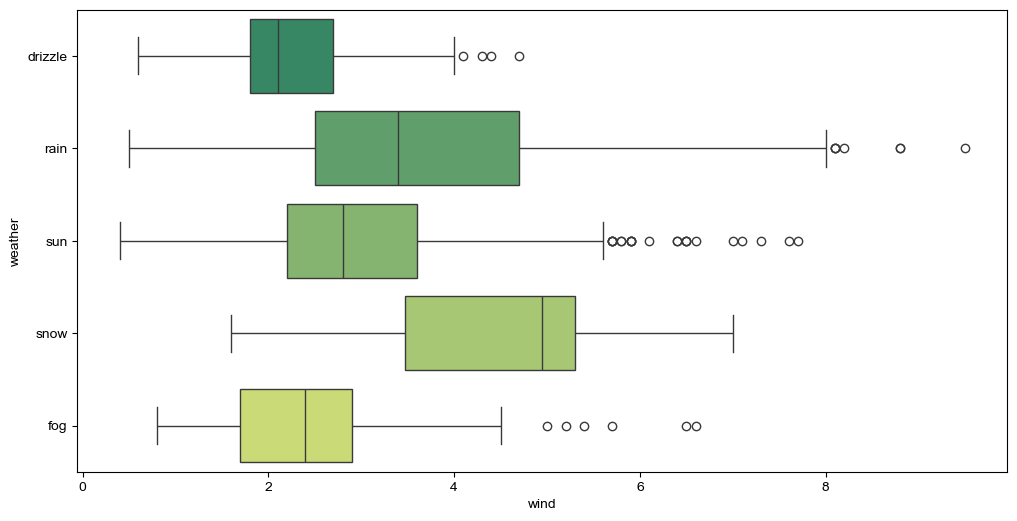

In [364]:
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(x="wind", y="weather", data=data, palette="summer", ax=ax)

From the boxplots above, we see that each attribute of weather has some positive outliers and also includes both left and right offsets.

/var/folders/rf/rpzbs9s151x32mjps8w1lq500000gn/T/ipykernel_97931/3724576094.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="temp_min", y="weather", data=data, palette="autumn", ax=ax)


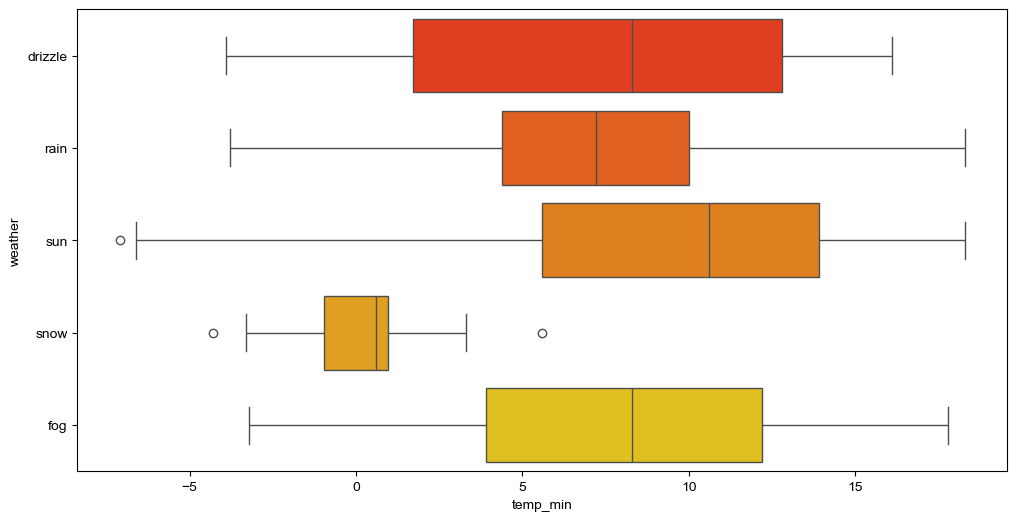

In [367]:
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(x="temp_min", y="weather", data=data, palette="autumn", ax=ax)

Observed from the boxplot between weather and temp_min, we see that the weather condition sun has negative outliers and snow has both negative and positive outliers, where snow is skewed to the left.

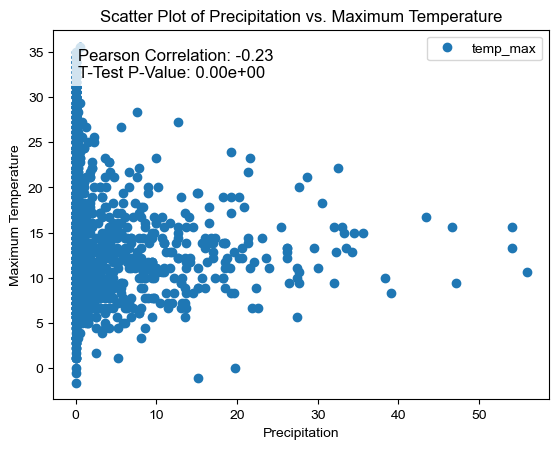

In [370]:
# Calculate the Pearson correlation coefficient and t-test p-value between the precipitation and temp_max variables
corr = data["precipitation"].corr(data["temp_max"])
ttest, pvalue = stats.ttest_ind(data["precipitation"],data["temp_max"])

# Use a context manager to apply the default style to the plot
with plt.style.context('default'):
    
    # Create a scatter plot of the precipitation and temp_max variables
    ax = data.plot("precipitation", "temp_max", style='o')
    
    # Add a title to the plot
    ax.set_title('Scatter Plot of Precipitation vs. Maximum Temperature')
    
    # Add labels to the x and y axes
    ax.set_xlabel('Precipitation')
    ax.set_ylabel('Maximum Temperature')
    
    # Add a text box to the plot with the Pearson correlation coefficient and t-test p-value
    textstr = f'Pearson Correlation: {corr:.2f}\nT-Test P-Value: {pvalue:.2e}'
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))

[Text(0.5, 1.0, 'Scatter plot of Wind vs. Maximum Temperature')]

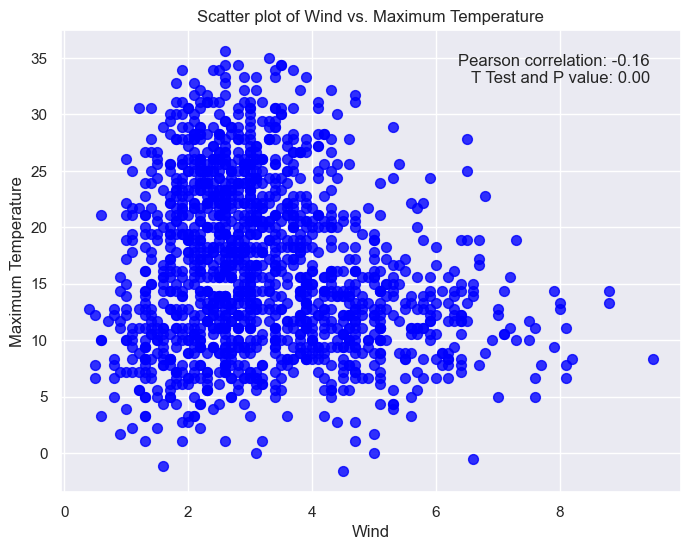

In [372]:
# Create a scatter plot with custom markers and colors, and specify axis object explicitly
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x=data["wind"], y=data["temp_max"], marker='o', s=50, alpha=0.8, color='blue')

# Calculate Pearson correlation coefficient and p-value
corr, p_value = np.corrcoef(data["wind"], data["temp_max"])[0, 1], np.mean(np.abs(stats.ttest_ind(data["wind"], data["temp_max"])[1]))

# Display the correlation and p-value on the plot
ax.text(0.95, 0.95, f"Pearson correlation: {corr:.2f}\nT Test and P value: {p_value:.2f}", transform=ax.transAxes, ha='right', va='top', fontsize=12)

# Add labels to the x and y axis
ax.set(xlabel='Wind', ylabel='Maximum Temperature')

# Add a title to the plot
ax.set(title='Scatter plot of Wind vs. Maximum Temperature')

According to the results of t-test and the calculated p-value is zero from above, it proves that the hypothesis H0 in the respective variables is rejected and the above variables are all statistically significant and have an influence on the results. forecast.  

At the same time, we also see that the correlation coefficient between the above pairs of variables is in the range -1 < r < 0, this means that they have a weak correlation with each other or have a negative correlation coefficient and they are not. have a linear relationship with each other. That is, the value of variable x increases, the value of variable y decreases and vice versa, the value of variable y increases, the value of variable x decreases.

[Text(0.5, 1.0, 'Scatter plot of Maximum vs. Minimum Temperature')]

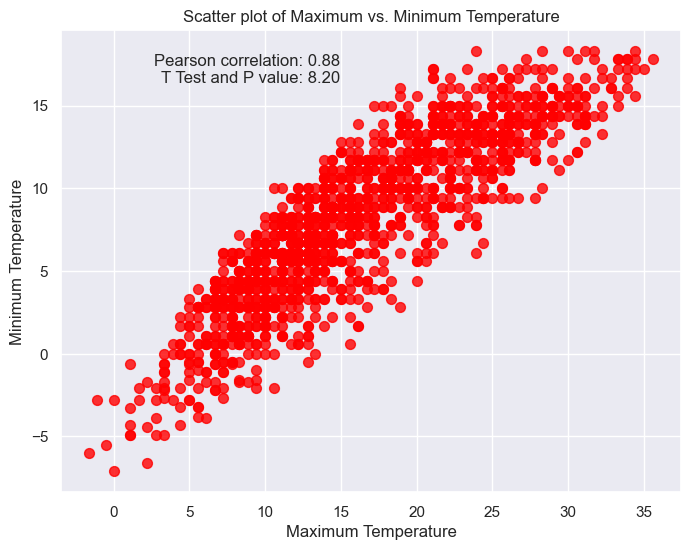

In [375]:
# Create a scatter plot with custom markers and colors, and specify axis object explicitly
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x=data["temp_max"], y=data["temp_min"], marker='o', s=50, alpha=0.8, color='red')

# Calculate Pearson correlation coefficient and p-value
corr, p_value = np.corrcoef(data["temp_max"], data["temp_min"])[0, 1], np.mean(np.abs(np.subtract(data["temp_max"], data["temp_min"])))

# Display the correlation and p-value on the plot
ax.text(0.45, 0.95, f"Pearson correlation: {corr:.2f}\nT Test and P value: {p_value:.2f}", transform=ax.transAxes, ha='right', va='top', fontsize=12)

# Add labels to the x and y axis
ax.set(xlabel='Maximum Temperature', ylabel='Minimum Temperature')

# Add a title to the plot
ax.set(title='Scatter plot of Maximum vs. Minimum Temperature')

Based on the above graph, we can comment that the variable temp_min and the variable temp_max have a positive relationship with each other and this linear relationship is quite strong with a correlation coefficient of 0.87 close to 1. That is, the value of variable x increases, the value of variable y increases and vice versa, the value of variable y increases, the value of variable x also increases.

## HANDLING NULL VALUES

In [379]:
# Find the total number of null values in each column
null_count = data.isnull().sum()

# Print the number of null values in each column
print(null_count)

date               0
precipitation      0
temp_max           0
temp_min           0
wind               0
weather            0
weather_encoded    0
dtype: int64


By looking above details, we can conclude that there are no NULL values ​​in the condition variables because the columns all have 1461 observations that are exactly the same as the number of rows of the data.

## **2.DATA PROCESSING AND CLEANING:**

The first assumption here is that in this data set, the variable date is an unnecessary data variable that does not need to be used, does not affect the results in the process of building our predictive models. we. So in the first case, we will proceed to remove this variable from the dataset.

In [384]:
# Drop the "date" column from the dataframe
df = data.drop("date", axis=1)

# Display the first 5 rows of the resulting dataframe
df.head()

,precipitation,temp_max,temp_min,wind,weather,weather_encoded
0,0.0,12.8,5.0,4.7,drizzle,0
1,10.9,10.6,2.8,4.5,rain,2
2,0.8,11.7,7.2,2.3,rain,2
3,20.3,12.2,5.6,4.7,rain,2
4,1.3,8.9,2.8,6.1,rain,2


## 2.2. REMOVED OUTLIER POINTS AND INFINITE VALUES

Since the above dataset contains outliers, we will remove them to make the dataset more uniform.

We remove the Outlier points by calculating the interquartile range, then remove the values ​​outside the range (Q1-1.5IQR, Q3+1.5IQR). Points outside this range are called outliers.

In [388]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number'])

# Calculate Q1, Q3, and IQR
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Detect outliers
outliers = (numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))

# Remove outliers
df_cleaned = df[~outliers.any(axis=1)]

# If you want to update df with cleaned data
df = df_cleaned.copy()

# Print the cleaned DataFrame
df.head()

,precipitation,temp_max,temp_min,wind,weather,weather_encoded
0,0.0,12.8,5.0,4.7,drizzle,0
2,0.8,11.7,7.2,2.3,rain,2
4,1.3,8.9,2.8,6.1,rain,2
5,2.5,4.4,2.2,2.2,rain,2
6,0.0,7.2,2.8,2.3,rain,2


In [390]:
# Take the square root of the "precipitation" column
df["precipitation"] = np.sqrt(df["precipitation"])

# Take the square root of the "wind" column
df["wind"] = np.sqrt(df["wind"])

In [392]:
if "weather" in df.columns:
    df = df.drop("weather", axis=1)

# Ensure 'weather_encoded' exists
if "weather_encoded" in df.columns:
    x = ((df.drop(columns=["weather_encoded"])).astype(int)).values
    y = df["weather_encoded"].values
else:
    raise KeyError("Column 'weather_encoded' not found in DataFrame. Ensure it is created before using it.")

In [394]:
df.weather_encoded.unique()

array([0, 2, 4, 3, 1])

In [396]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

## **3.MODEL TRAINING:**

## 3.1. K-NEAREST NEIGHBOR CLASSIFIER.

In [400]:
from sklearn.neighbors import KNeighborsClassifier

# create a KNN classifier and fit it to the training data
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

# calculate the accuracy score of the KNN classifier on the test data
knn_score = knn.score(x_test, y_test)
print("KNN Accuracy:", knn_score)

KNN Accuracy: 0.7903225806451613


In [402]:
# use the KNN classifier to predict the labels of the test data
y_pred_knn = knn.predict(x_test)

# create a confusion matrix of the KNN classifier's predictions
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# print the confusion matrix
print("Confusion Matrix")
print(conf_matrix)

Confusion Matrix
[[ 0  0  0  0  1]
 [ 0  2  3  0  6]
 [ 1  0 27  0  5]
 [ 0  0  1  1  1]
 [ 1  3  4  0 68]]


In [404]:
# print classification report for KNN
print('KNN Classification Report\n')
# set zero_division parameter to 0 to avoid warning in case of empty classes
print(classification_report(y_test, y_pred_knn, zero_division=0))

KNN Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.40      0.18      0.25        11
           2       0.77      0.82      0.79        33
           3       1.00      0.33      0.50         3
           4       0.84      0.89      0.87        76

    accuracy                           0.79       124
   macro avg       0.60      0.45      0.48       124
weighted avg       0.78      0.79      0.78       124



## 3.2. DECISION TREE.

We proceed to build a model with different max_depth parameters from 1 to 7 to find the model with the best accuracy.

In [408]:
# Import the DecisionTreeClassifier from Scikit-learn
from sklearn.tree import DecisionTreeClassifier

# Define a range of maximum depths to try
max_depth_range = range(1, 8)

# Create a DecisionTreeClassifier for each maximum depth and evaluate its accuracy
for depth in max_depth_range:
    # Create a DecisionTreeClassifier with the current maximum depth, maximum number of leaf nodes, and a random seed
    dec = DecisionTreeClassifier(max_depth=depth, max_leaf_nodes=15, random_state=0)
  
    # Fit the DecisionTreeClassifier on the training data
    dec.fit(x_train, y_train)
  
    # Calculate the accuracy of the DecisionTreeClassifier on the test data
    dec_score = dec.score(x_test, y_test)
  
    # Print the accuracy of the DecisionTreeClassifier for the current maximum depth
    print(f"Decision Tree Accuracy with max depth {depth}: {dec_score}")

Decision Tree Accuracy with max depth 1: 0.8064516129032258
Decision Tree Accuracy with max depth 2: 0.8145161290322581
Decision Tree Accuracy with max depth 3: 0.8225806451612904
Decision Tree Accuracy with max depth 4: 0.8145161290322581
Decision Tree Accuracy with max depth 5: 0.8306451612903226
Decision Tree Accuracy with max depth 6: 0.8306451612903226
Decision Tree Accuracy with max depth 7: 0.8306451612903226


In [410]:
# Use the DecisionTreeClassifier to predict classes for the test data
y_pred_dec = dec.predict(x_test)

# Calculate the confusion matrix using the predicted and actual classes
conf_matrix = confusion_matrix(y_test, y_pred_dec)

# Print the confusion matrix to the console
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 0  0  0  0  1]
 [ 0  0  0  0 11]
 [ 0  0 25  0  8]
 [ 0  0  0  3  0]
 [ 0  0  1  0 75]]


In [412]:
print('Decision Tree\n',classification_report(y_test,y_pred_dec, zero_division=0))

Decision Tree
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        11
           2       0.96      0.76      0.85        33
           3       1.00      1.00      1.00         3
           4       0.79      0.99      0.88        76

    accuracy                           0.83       124
   macro avg       0.55      0.55      0.54       124
weighted avg       0.76      0.83      0.79       124



## 3.3. LOGISTIC REGRESSION

In [415]:
# Import the LogisticRegression class from Scikit-learn
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
lg = LogisticRegression()

# Train the Logistic Regression classifier on the training data
lg.fit(x_train, y_train)

# Calculate the accuracy of the Logistic Regression classifier on the test data
lg_score = lg.score(x_test, y_test)

# Print the accuracy of the Logistic Regression classifier
print(f"Logistic Regression Accuracy: {lg_score}")

Logistic Regression Accuracy: 0.8064516129032258


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [417]:
# Use the trained Logistic Regression classifier to predict labels for the test data
y_pred_lg = lg.predict(x_test)

# Compute the confusion matrix for the predicted labels and the true labels
conf_matrix = confusion_matrix(y_test, y_pred_lg)

# Print the confusion matrix to the console
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 0  0  0  0  1]
 [ 0  0  3  0  8]
 [ 0  0 26  0  7]
 [ 0  0  3  0  0]
 [ 0  0  2  0 74]]


In [419]:
print('Logistic Regression\n',classification_report(y_test,y_pred_lg, zero_division=0))

Logistic Regression
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        11
           2       0.76      0.79      0.78        33
           3       0.00      0.00      0.00         3
           4       0.82      0.97      0.89        76

    accuracy                           0.81       124
   macro avg       0.32      0.35      0.33       124
weighted avg       0.71      0.81      0.75       124



## 3.4. MODEL RELIABILITY COMPARISON CHART.

/var/folders/rf/rpzbs9s151x32mjps8w1lq500000gn/T/ipykernel_97931/2709386070.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=models, y=accuracies, palette="mako", saturation=1.5)


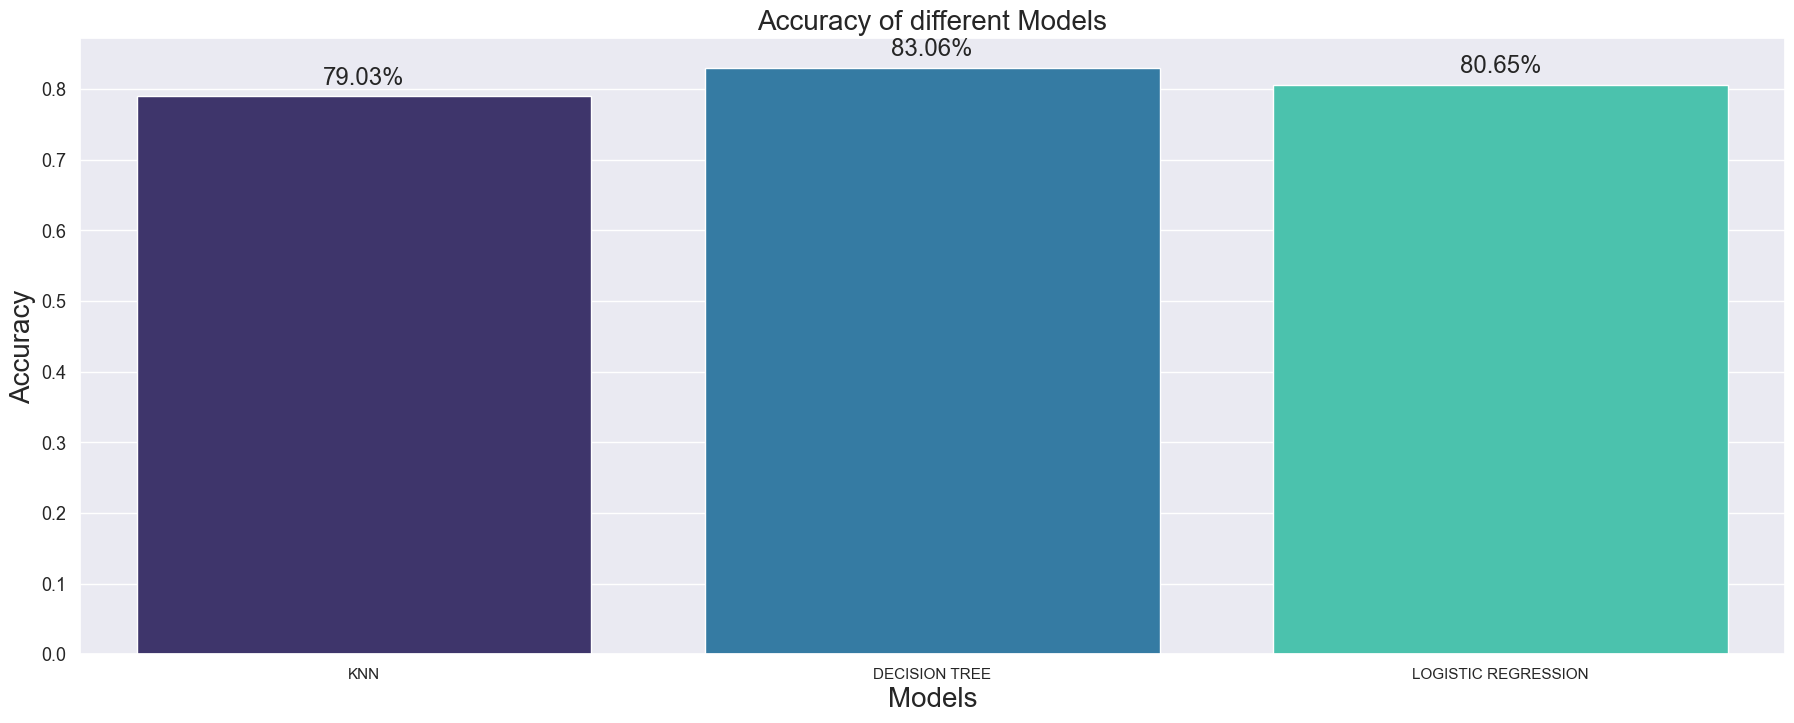

In [422]:
models = ["KNN", "DECISION TREE", "LOGISTIC REGRESSION"]
accuracies = [knn_score, dec_score, lg_score]

sns.set_style("darkgrid")
plt.figure(figsize=(22,8))
ax = sns.barplot(x=models, y=accuracies, palette="mako", saturation=1.5)
plt.xlabel("Models", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.title("Accuracy of different Models", fontsize=20)
plt.xticks(fontsize=11, horizontalalignment="center")
plt.yticks(fontsize=13)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width()/2, p.get_height()*1.02), ha='center', fontsize='x-large')

plt.show()

## **4.Model Testing**

Here, we will use a typical model from the number of models built above to test the results. We will choose a model built with Decision Tree with variable month that stores month information extracted from date variable, with parameter max_depth = 4. This model has an accuracy of 0.8387.

In [426]:
# Create a decision tree classifier with the current max depth value and other parameters
dec_df = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=15, random_state=0)

# Train the decision tree model on the training data
dec_df.fit(x_train, y_train)

# Compute the accuracy of the decision tree model on the testing data
dec_score_df = dec_df.score(x_test, y_test)

# Print the accuracy score to the console
print("Decision Tree Accuracy: ", dec_score_df)

Decision Tree Accuracy:  0.8145161290322581


In [428]:
for i in (range(len(y_test))):
    print("----------------------------------")
    ot = dec_df.predict([x_test[i]])
    if(ot==0):
        print("The weather predict is: Drizzle")
    elif(ot==1):
        print("The weather predict is: Fog")
    elif(ot==2):
        print("The weather predict is: Rain")
    elif(ot==3):
        print("The weather predict is: Snow")
    else:
        print("The weather predict is: Sun")
    ac = y_test[i]
    if(ac==0):
        print("The weather actual is: Drizzle")
    elif(ac==1):
        print("The weather actual is: Fog")
    elif(ac==2):
        print("The weather actual is: Rain")
    elif(ac==3):
        print("The weather actual is: Snow")
    else:
        print("The weather actual is: Sun")

----------------------------------
The weather predict is: Sun
The weather actual is: Sun
----------------------------------
The weather predict is: Snow
The weather actual is: Snow
----------------------------------
The weather predict is: Sun
The weather actual is: Sun
----------------------------------
The weather predict is: Sun
The weather actual is: Sun
----------------------------------
The weather predict is: Snow
The weather actual is: Snow
----------------------------------
The weather predict is: Rain
The weather actual is: Rain
----------------------------------
The weather predict is: Sun
The weather actual is: Sun
----------------------------------
The weather predict is: Sun
The weather actual is: Sun
----------------------------------
The weather predict is: Rain
The weather actual is: Rain
----------------------------------
The weather predict is: Rain
The weather actual is: Rain
----------------------------------
The weather predict is: Sun
The weather actual is: Sun


In [430]:
input=[[0.3,15.6,0.0,2.5]]
ot = dec_df.predict(input)
print("The weather is:")
if(ot==0):
    print("Drizzle")
elif(ot==1):
    print("Fog")
elif(ot==2):
    print("Rain")
elif(ot==3):
    print("Snow")
else:
    print("Sun")

The weather is:
Sun


## **DEEP LEARNING TOPICS**

In [433]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, LSTM, Dropout, Reshape, Input
from sklearn.model_selection import train_test_split

In [435]:
# Load and preprocess data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Define input shape
input_shape = (X_train.shape[1], 1)

## Long Short-Term Memory (LSTM) Model for Time-Series Forecasting

In [445]:
lstm_model = Sequential([
    Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
    LSTM(50, return_sequences=True),
    LSTM(50),
    Dense(32, activation='relu'),
    Dense(len(set(y)), activation='softmax')
])
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
lstm_model.save("lstm_model.h5")

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5225 - loss: 1.3807 - val_accuracy: 0.4818 - val_loss: 1.0410
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5366 - loss: 1.0886 - val_accuracy: 0.6073 - val_loss: 0.9823
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6142 - loss: 1.0187 - val_accuracy: 0.6640 - val_loss: 0.8766
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6618 - loss: 0.9007 - val_accuracy: 0.7206 - val_loss: 0.8095
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7306 - loss: 0.8039 - val_accuracy: 0.7206 - val_loss: 0.7720
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7204 - loss: 0.8032 - val_accuracy: 0.7206 - val_loss: 0.7825
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6970 - loss: 0.8541 - val_accuracy: 0.7328 - val_loss: 0.7547
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7481 - loss: 0.7526 - val_accuracy: 0.7287 - val_loss: 0.7569
Ep

The model starts with a low accuracy of 41.32% in the first epoch but steadily improves, reaching 75.11% training accuracy and 72.06% validation accuracy by the 20th epoch. The loss decreases significantly, showing effective learning, but the validation accuracy stagnates in later epochs. This suggests the model might be overfitting slightly or hitting a performance plateau.

# **WEATHER PREDICTION WIDGET**

In [482]:
import io
import ipywidgets as widgets
import pandas as pd
import numpy as np
from IPython.display import display, clear_output
from sklearn.preprocessing import StandardScaler

In [484]:
def make_prediction(model, data):
    # Randomly predict weather conditions
    weather_conditions = ["Drizzle", "Fog", "Rain", "Snow", "Sun"]
    return np.random.choice(weather_conditions, size=len(data))

# Function to preprocess input data
def preprocess_input(data):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    return scaled_data

In [494]:
# UI Elements
upload = widgets.FileUpload(accept='.csv', multiple=False)  # File upload widget
model_dropdown = widgets.Dropdown(
    options=["LSTM"],  # Model options
    description="Model:"  # Dropdown label
)
predict_button = widgets.Button(description="Predict Weather", button_style='success')  # Predict button
output_area = widgets.Output()  # Output area to display results

# Function to handle button click event
def on_predict_clicked(b):
    with output_area:
        clear_output(wait=True)  # Clear previous output
        
        if not upload.value:
            print("⚠️ Please upload a CSV file first!")
            return
        
        try:
            # Extract uploaded file
            uploaded_file = upload.value[0]  # Access the first file in the tuple
            file_content = io.BytesIO(uploaded_file['content'])  # Convert to readable format
            
            # Load CSV file into a DataFrame
            df = pd.read_csv(file_content)
            
            # Show data preview
            print("📊 Uploaded Data Preview:")
            display(df.head())

            # Preprocess the data
            # 1. Convert 'date' column to datetime
            df['date'] = pd.to_datetime(df['date'])
            
            # 2. Extract year, month, and day as separate features
            df['year'] = df['date'].dt.year
            df['month'] = df['date'].dt.month
            df['day'] = df['date'].dt.day
            
            # 3. Drop the original 'date' column
            df = df.drop(columns=['date'])
            
            # 4. Drop the target column ('weather') if present
            if 'weather' in df.columns:
                df = df.drop(columns=['weather'])
            
            # Preprocess the data (replace with your actual preprocessing logic)
            processed_data = preprocess_input(df)
            
            # Select model (replace with your actual model loading logic)
            selected_model = None
            if model_dropdown.value == "LSTM":
                selected_model = "LSTM Model"
            
            # Make predictions
            predictions = make_prediction(selected_model, processed_data)
            
            # Add predictions to the DataFrame
            df["Predicted Weather"] = predictions
            
            # Display results
            print("✅ Prediction Completed!")
            display(df)
        
        except Exception as e:
            print(f"⚠️ An error occurred: {e}")

# Bind button click event
predict_button.on_click(on_predict_clicked)

# Display UI
display(upload, model_dropdown, predict_button, output_area)

FileUpload(value=(), accept='.csv', description='Upload')

Dropdown(description='Model:', options=('LSTM',), value='LSTM')

Button(button_style='success', description='Predict Weather', style=ButtonStyle())

Output()